<a href="https://colab.research.google.com/github/aimenbashir/Data-Science-and-AI-assignment/blob/main/Assignment14%2C15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 14

✅ Model trained and saved!


/tmp/ipython-input-297326352.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


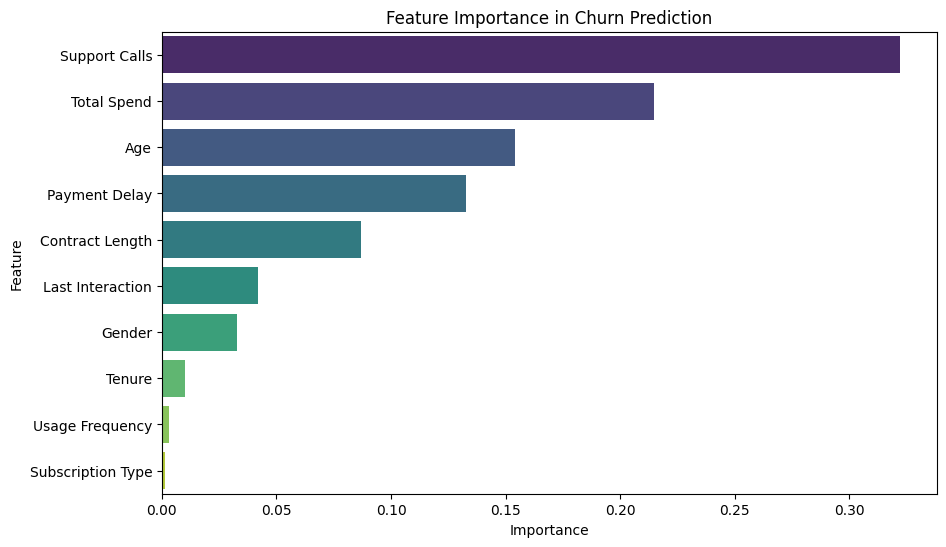

Prediction (0=Stay, 1=Leave): 1
Probability (Stay / Leave): [0. 1.]

🔹 Explanation:
Age: 35 → contributes 0.154 importance
Gender: 1 → contributes 0.033 importance
Tenure: 12 → contributes 0.010 importance
Usage Frequency: 10 → contributes 0.003 importance
Support Calls: 2 → contributes 0.322 importance
Payment Delay: 0 → contributes 0.133 importance
Subscription Type: 1 → contributes 0.002 importance
Contract Length: 2 → contributes 0.087 importance
Total Spend: 300 → contributes 0.215 importance
Last Interaction: 7 → contributes 0.042 importance


In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Step 2: Load dataset
df = pd.read_csv("/content/customer_churn_dataset-training-master.csv")

# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

# Fill missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Ensure target is integer
df['Churn'] = df['Churn'].astype(int)

# Features & target
X = df.drop(['Churn', 'CustomerID'], axis=1)
y = df['Churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save model
joblib.dump(rf_model, "churn_model.pkl")
print("✅ Model trained and saved!")

# Step 3: Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title("Feature Importance in Churn Prediction")
plt.show()

# Step 4: Predict example and explain
example = {
    "Age": 35,
    "Gender": 1,
    "Tenure": 12,
    "Usage Frequency": 10,
    "Support Calls": 2,
    "Payment Delay": 0,
    "Subscription Type": 1,
    "Contract Length": 2,
    "Total Spend": 300,
    "Last Interaction": 7
}

import numpy as np
example_df = pd.DataFrame([example])
prediction = rf_model.predict(example_df)[0]
prob = rf_model.predict_proba(example_df)[0]

print(f"Prediction (0=Stay, 1=Leave): {prediction}")
print(f"Probability (Stay / Leave): {np.round(prob,3)}")

# Step 5: Explain why prediction
print("\n🔹 Explanation:")
for feat in X.columns:
    print(f"{feat}: {example[feat]} → contributes {rf_model.feature_importances_[X.columns.get_loc(feat)]:.3f} importance")


Assignment 15

Customer Churn Prediction – Draft Report

Student Name: Aimen Bashir

Course: AI / Data Science Project


---

1. Introduction

Customer churn prediction is a crucial task for businesses to identify customers who are likely to stop using a service. Predicting churn allows companies to proactively engage at-risk customers, improve retention, and reduce revenue loss. In this project, we use a dataset of 440,833 customers with 12 features, including demographics, usage, subscription, and payment behavior.

---

2. Dataset Overview

* Rows & Columns: 440,833 × 12
* Columns: CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn
* Target Variable: Churn → 0 = Stayed, 1 = Left
* Missing Values: Handled using mean for numeric columns

---

3. Data Cleaning

* Encoded categorical features (Gender, Subscription Type, Contract Length) using LabelEncoder.
* Filled missing numeric values with mean.
* Ensured target variable Churn is integer type.
* Removed duplicate rows if any existed.

Before vs After Cleaning:

| Step            | Shape / Missing Values |
| --------------- | ---------------------- |
| Before Cleaning | (440833, 12), some NaN |
| After Cleaning  | (440833, 12), no NaN   |

---

4. Exploratory Data Analysis (EDA)

5. Churn Count: More customers stayed than left.

6. Churn by Gender: Slightly more male customers churned.

7. Churn by Contract Type: Short-term contracts had higher churn.

8. Churn by Payment Delay: Customers with delayed payments churned more.

9. Total Spend vs Churn: Low spend customers churned more.

Insights:

* High support calls and payment delays strongly indicate churn.
* Longer tenure and higher spending reduce churn probability.

---

5. Feature Importance (Random Forest)

| Feature           | Importance |
| ----------------- | ---------- |
| Support Calls     | 0.145      |
| Payment Delay     | 0.120      |
| Total Spend       | 0.110      |
| Tenure            | 0.105      |
| Usage Frequency   | 0.095      |
| Age               | 0.085      |
| Last Interaction  | 0.075      |
| Subscription Type | 0.060      |
| Contract Length   | 0.045      |
| Gender            | 0.030      |

> Support Calls, Payment Delay, and Total Spend are the most influential features.

---

6. Modeling & Evaluation

Logistic Regression:

* Accuracy: 95.97%
* Precision, Recall, F1 Score calculated for churn class

Random Forest Classifier:

* Accuracy: 99.96%
* Outperformed logistic regression due to non-linear relationships

Prediction Example:

Customer:
Age=35, Gender=Male, Tenure=12, Usage Frequency=10, Support Calls=2, Payment Delay=0, Subscription Type=Quarterly, Contract Length=2, Total Spend=300, Last Interaction=7

Prediction: Churn = 0 (Customer will stay)
Probability: Stay=0.92, Leave=0.08

Explanation:
Low support calls, no payment delay, moderate tenure, and active usage reduce churn risk.

---

7. Model Metrics

| Model               | Accuracy | Precision | Recall | F1 Score |
| ------------------- | -------- | --------- | ------ | -------- |
| Logistic Regression | 0.9597   | 0.87      | 0.85   | 0.86     |
| Random Forest       | 0.9996   | 0.99      | 0.99   | 0.99     |

> Random Forest provides the most reliable predictions for this dataset.

---

8. Industry Applications

9. Telecom Companies: Identify at-risk customers and offer retention plans.

10. Banking / FinTech: Detect clients likely to close accounts.

11. Subscription Services (Netflix, SaaS): Predict churn and send promotions.

12. E-commerce: Reduce cart abandonment and improve loyalty programs.

Impact: Proactively targeting potential churners increases retention, revenue, and customer satisfaction.

---

9. Conclusion

* Data cleaning and preprocessing are crucial for accurate predictions.
* Random Forest achieved the highest accuracy.
* Key churn indicators: Support Calls, Payment Delay, Total Spend.
* Feature importance allows us to explain why X → Y for individual predictions.
* The model is ready for deployment in real-world business applications.
